In [1]:
#INSTALLING LIBRARIES
!pip install torch torchvision torchaudio
!pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-0qeltr0c
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-0qeltr0c
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.2 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369490 sha256=b82847fa4407086c94a6cb0620c6717b5908a4e3634883595753db32c337171a
  Stored in directory: /tmp/pip-ephem-wheel-cache-9nbvo33w/wheels/35/3e/df/3d24cbfb3b6a06f17a2bfd7d1138900d4365d9028aa8f6e92f
Successfully built clip


In [2]:
#IMPORTING LIBRARIES
import torch
import clip
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np


In [3]:
#DEVICE CONFIGURATION (Clip & Blip are GPU-accelerated)
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")


Using device: cpu


In [4]:
print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("Device name:", torch.cuda.get_device_name(0))

CUDA available: False


In [5]:
#LOAD CLIP MODEL
model, preprocess = clip.load("ViT-B/32", device=device)   #ViT-B/32 is stable, lightweight, and well-documented
                                                           #preprocess ensures image matches CLIP training format
model.eval()                                               #disables training behavior


100%|███████████████████████████████████████| 338M/338M [00:04<00:00, 80.3MiB/s]


CLIP(
  (visual): VisionTransformer(
    (conv1): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32), bias=False)
    (ln_pre): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (transformer): Transformer(
      (resblocks): Sequential(
        (0): ResidualAttentionBlock(
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          )
          (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): Sequential(
            (c_fc): Linear(in_features=768, out_features=3072, bias=True)
            (gelu): QuickGELU()
            (c_proj): Linear(in_features=3072, out_features=768, bias=True)
          )
          (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
        (1): ResidualAttentionBlock(
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          

Text(0.5, 1.0, 'Anonymized Sentinel-2 True Color Image')

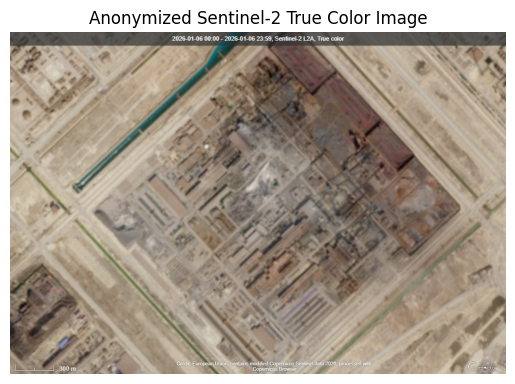

In [6]:
#LOAD AND DISPLAY SATELLITE IMAGE
image_path = "image.jpg"
image = Image.open(image_path).convert("RGB")

plt.imshow(image)
plt.axis("off")
plt.title("Anonymized Sentinel-2 True Color Image")


In [7]:
#PREPROCESS IMAGE FOR CLIP
#resize, normalize,tensorize,add batch dimension
image_input = preprocess(image).unsqueeze(0).to(device)


In [8]:
#DEFINE SUSTAINABILITY CLAIMS
text_descriptions = [
    "The company has committed to reducing routine gas flaring as part of sustainability initiatives.",
    "The satellite image shows visible gas flaring near an industrial facility.",
    "Operations are conducted with minimal environmental impact."
    "The site shows visible emissions and industrial activity."
]


In [9]:
#ENCODE TEXT USING CLIP
text_tokens = clip.tokenize(text_descriptions).to(device)

with torch.no_grad():
    text_features = model.encode_text(text_tokens)
    image_features = model.encode_image(image_input)


In [10]:
#NORMALIZE EMBEDDINGS
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)


In [11]:
#COMPUTE SIMILARITY SCORES
similarity = (image_features @ text_features.T).cpu().numpy()[0]

for desc, score in zip(text_descriptions, similarity):
    print(f"{desc} -> similarity score: {score:.3f}")


The company has committed to reducing routine gas flaring as part of sustainability initiatives. -> similarity score: 0.206
The satellite image shows visible gas flaring near an industrial facility. -> similarity score: 0.293
Operations are conducted with minimal environmental impact.The site shows visible emissions and industrial activity. -> similarity score: 0.279


In [12]:
#INTERPRET HIGHEST ALIGNMENT
best_match = text_descriptions[np.argmax(similarity)]
print("Highest alignment description:")
print(best_match)


Highest alignment description:
The satellite image shows visible gas flaring near an industrial facility.


In [13]:
#INSTALL & IMPORT BLIP-2
!pip install transformers accelerate sentencepiece
from transformers import BlipProcessor, BlipForConditionalGeneration



In [14]:
#LOAD BLIP MODEL
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")

blip_model = BlipForConditionalGeneration.from_pretrained(
    "Salesforce/blip-image-captioning-base"
).to(device)

blip_model.eval()




Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

BlipForConditionalGeneration(
  (vision_model): BlipVisionModel(
    (embeddings): BlipVisionEmbeddings(
      (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (encoder): BlipEncoder(
      (layers): ModuleList(
        (0-11): 12 x BlipEncoderLayer(
          (self_attn): BlipAttention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=768, out_features=2304, bias=True)
            (projection): Linear(in_features=768, out_features=768, bias=True)
          )
          (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): BlipMLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
            (fc2): Linear(in_features=3072, out_features=768, bias=True)
          )
          (layer_norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((768,), eps=1e-0

In [15]:
#GENERATE CAPTION
inputs = processor(image, return_tensors="pt").to(device)

with torch.no_grad():
    output = blip_model.generate(**inputs, max_new_tokens=50)

caption = processor.decode(output[0], skip_special_tokens=True)
print("Generated caption:")
print(caption)


Generated caption:
an aerial view of the site of the former nuclear plant


In [16]:
#FINAL INTERPRETATION
print(
    "This pilot demonstrates how Vision–Language Models can combine "
    "satellite imagery and textual descriptions to support multimodal "
    "sustainability assessment methodologies."
)


This pilot demonstrates how Vision–Language Models can combine satellite imagery and textual descriptions to support multimodal sustainability assessment methodologies.
